In [1]:
import pandas as pd
pd.set_option('display.max_columns',50)
#dados=pd.read_csv('C:/Users/Falcone/Documents/0_MachineLearning/2022.05.13_ExercioFinalM1/recipeData.csv', encoding='utf-8')
dados=pd.read_csv('C:/Users/Falcone/Documents/0_MachineLearning/2022.05.13_ExercioFinalM1/recipeData.csv', encoding='ISO-8859-1')

In [2]:
dados

,BeerID,Name,URL,Style,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,SugarScale,BrewMethod,PitchRate,PrimaryTemp,PrimingMethod,PrimingAmount,UserId
0,1,Vanilla Cream Ale,/homebrew/recipe/view/1633/vanilla-cream-ale,Cream Ale,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,Specific Gravity,All Grain,NaN,17.78,corn sugar,4.5 oz,116.0
1,2,Southern Tier Pumking clone,/homebrew/recipe/view/16367/southern-tier-pumk...,Holiday/Winter Special Spiced Beer,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,955.0
2,3,Zombie Dust Clone - EXTRACT,/homebrew/recipe/view/5920/zombie-dust-clone-e...,American IPA,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,Specific Gravity,extract,NaN,NaN,NaN,NaN,NaN
3,4,Zombie Dust Clone - ALL GRAIN,/homebrew/recipe/view/5916/zombie-dust-clone-a...,American IPA,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,Specific Gravity,All Grain,NaN,NaN,NaN,NaN,NaN
4,5,Bakke Brygg Belgisk Blonde 50 l,/homebrew/recipe/view/89534/bakke-brygg-belgis...,Belgian Blond Ale,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,Specific Gravity,All Grain,NaN,19.00,Sukkerlake,6-7 g sukker/l,18325.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73856,73857,Amber Alfie 2,/homebrew/recipe/view/609673/amber-alfie-2,British Strong Ale,36,21.00,1.052,1.012,5.22,39.73,6.96,18.00,60,1.060,63.0,3.0,Specific Gravity,All Grain,1.25,20.00,NaN,NaN,59658.0
73857,73858,Rye IPA,/homebrew/recipe/view/610955/rye-ipa,Specialty IPA: Rye IPA,151,10.00,1.059,1.010,6.37,59.21,7.90,17.00,60,1.034,60.0,NaN,Specific Gravity,BIAB,0.50,22.00,NaN,NaN,NaN
73858,73859,SK-Kölsch,/homebrew/recipe/view/586891/,NaN,111,16.00,1.046,1.008,5.01,25.42,3.63,18.00,90,1.041,65.0,NaN,Specific Gravity,BIAB,0.35,17.00,sucrose,140 g,82450.0
73859,73860,Flata Rødkløver,/homebrew/recipe/view/603788/,Irish Red Ale,92,24.00,1.051,1.014,4.82,25.65,14.12,28.00,60,1.043,72.0,NaN,Specific Gravity,All Grain,NaN,18.00,Sukkerlake,5 g sukker/l,NaN


In [3]:
dados.isnull().sum()/len(dados['Name'])*100

BeerID            0.000000
Name              0.001354
URL               0.000000
Style             0.806921
StyleID           0.000000
Size(L)           0.000000
OG                0.000000
FG                0.000000
ABV               0.000000
IBU               0.000000
Color             0.000000
BoilSize          0.000000
BoilTime          0.000000
BoilGravity       4.048144
Efficiency        0.000000
MashThickness    40.432705
SugarScale        0.000000
BrewMethod        0.000000
PitchRate        53.143066
PrimaryTemp      30.681957
PrimingMethod    90.839550
PrimingAmount    93.536508
UserId           68.358132
dtype: float64

In [4]:
dados.dtypes

BeerID             int64
Name              object
URL               object
Style             object
StyleID            int64
Size(L)          float64
OG               float64
FG               float64
ABV              float64
IBU              float64
Color            float64
BoilSize         float64
BoilTime           int64
BoilGravity      float64
Efficiency       float64
MashThickness    float64
SugarScale        object
BrewMethod        object
PitchRate        float64
PrimaryTemp      float64
PrimingMethod     object
PrimingAmount     object
UserId           float64
dtype: object

In [5]:
#Eliminaçao das colunas sem dados numericos ou dados que nao sao importantes
#dados.drop('Name',axis=1)
dados1=dados.drop(['BeerID','Name','URL','Style','SugarScale','PrimingMethod','PrimingAmount'],axis=1)
#dados.drop(['Name','URL','Style','SugarScale','BrewMethod','PrimingMethod','PrimingAmount'],axis=1)
#dados.drop('Name',axis=1)
#dados.drop('URL',axis=1)
#Quando eu executo o comando dados.dtypes ele mostra todas as colunas originais, sem fazer o drop. Consegui resolver isso
#criando uma dataframe com novo nome dados1

In [6]:
#Convertendo uma coluna de dados de texto para numeros
brewmet_convert=pd.get_dummies(dados1['BrewMethod'])
dados1.drop('BrewMethod', axis=1, inplace=True)
dados1=pd.concat([dados1, brewmet_convert], axis=1)

In [7]:
dados1

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,MashThickness,PitchRate,PrimaryTemp,UserId,All Grain,BIAB,Partial Mash,extract
0,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,NaN,NaN,17.78,116.0,1,0,0,0
1,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,NaN,NaN,NaN,955.0,1,0,0,0
2,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,NaN,NaN,NaN,NaN,0,0,0,1
3,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,NaN,NaN,NaN,NaN,1,0,0,0
4,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,NaN,NaN,19.00,18325.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73856,36,21.00,1.052,1.012,5.22,39.73,6.96,18.00,60,1.060,63.0,3.0,1.25,20.00,59658.0,1,0,0,0
73857,151,10.00,1.059,1.010,6.37,59.21,7.90,17.00,60,1.034,60.0,NaN,0.50,22.00,NaN,0,1,0,0
73858,111,16.00,1.046,1.008,5.01,25.42,3.63,18.00,90,1.041,65.0,NaN,0.35,17.00,82450.0,0,1,0,0
73859,92,24.00,1.051,1.014,4.82,25.65,14.12,28.00,60,1.043,72.0,NaN,NaN,18.00,NaN,1,0,0,0


In [8]:
dados1.dtypes

StyleID            int64
Size(L)          float64
OG               float64
FG               float64
ABV              float64
IBU              float64
Color            float64
BoilSize         float64
BoilTime           int64
BoilGravity      float64
Efficiency       float64
MashThickness    float64
PitchRate        float64
PrimaryTemp      float64
UserId           float64
All Grain          uint8
BIAB               uint8
Partial Mash       uint8
extract            uint8
dtype: object

In [9]:
dados1.isnull().sum()/len(dados['BeerID'])*100

StyleID           0.000000
Size(L)           0.000000
OG                0.000000
FG                0.000000
ABV               0.000000
IBU               0.000000
Color             0.000000
BoilSize          0.000000
BoilTime          0.000000
BoilGravity       4.048144
Efficiency        0.000000
MashThickness    40.432705
PitchRate        53.143066
PrimaryTemp      30.681957
UserId           68.358132
All Grain         0.000000
BIAB              0.000000
Partial Mash      0.000000
extract           0.000000
dtype: float64

In [10]:
#Eliminacao das colunas que possuem muitos dados faltantes
dados1.drop(['MashThickness','PitchRate','PrimaryTemp','UserId'],axis=1, inplace=True)
dados1

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,All Grain,BIAB,Partial Mash,extract
0,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,1,0,0,0
1,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,1,0,0,0
2,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,NaN,70.0,0,0,0,1
3,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,NaN,70.0,1,0,0,0
4,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73856,36,21.00,1.052,1.012,5.22,39.73,6.96,18.00,60,1.060,63.0,1,0,0,0
73857,151,10.00,1.059,1.010,6.37,59.21,7.90,17.00,60,1.034,60.0,0,1,0,0
73858,111,16.00,1.046,1.008,5.01,25.42,3.63,18.00,90,1.041,65.0,0,1,0,0
73859,92,24.00,1.051,1.014,4.82,25.65,14.12,28.00,60,1.043,72.0,1,0,0,0


array([[<AxesSubplot:title={'center':'BoilGravity'}>]], dtype=object)

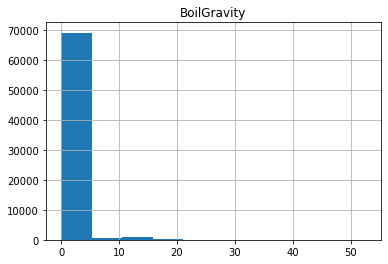

In [12]:
dados1.hist(column='BoilGravity')

In [14]:
#NOVA TENTATIVA DE PREENCHIMENTO DE DADOS FALTANTES DA MANEIRA TRADICIONAL - funcionou!!
dados1['BoilGravity'].fillna(dados1['BoilGravity'].median(), inplace=True)
dados1

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,All Grain,BIAB,Partial Mash,extract
0,45,21.77,1.055,1.013,5.48,17.65,4.83,28.39,75,1.038,70.0,1,0,0,0
1,85,20.82,1.083,1.021,8.16,60.65,15.64,24.61,60,1.070,70.0,1,0,0,0
2,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,1.047,70.0,0,0,0,1
3,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,1.047,70.0,1,0,0,0
4,20,50.00,1.060,1.010,6.48,17.84,4.57,60.00,90,1.050,72.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73856,36,21.00,1.052,1.012,5.22,39.73,6.96,18.00,60,1.060,63.0,1,0,0,0
73857,151,10.00,1.059,1.010,6.37,59.21,7.90,17.00,60,1.034,60.0,0,1,0,0
73858,111,16.00,1.046,1.008,5.01,25.42,3.63,18.00,90,1.041,65.0,0,1,0,0
73859,92,24.00,1.051,1.014,4.82,25.65,14.12,28.00,60,1.043,72.0,1,0,0,0


In [ ]:
#dados3.boxplot(column='Size(L)')
#dados3.boxplot(column=['OG','FG','ABV'])
#dados3.boxplot(column='OG')
#dados3.boxplot(column='FG')
#dados3.boxplot(column='ABV')
#dados3.boxplot(column='IBU')
#dados3.boxplot(column='Color')
#dados3.boxplot(column='BoilSize')
#dados3.boxplot(column='BoilTime')
#dados3.boxplot(column='Efficiency')
#dados3.boxplot(column='BoilGravity')

In [15]:
#Utilizar somente classes com mais de 1000 amostras
#Realizar contagem da frequencia de cada classe
lista=dados1['StyleID'].value_counts()
lista

7      11940
10      7581
134     2617
9       2277
4       2038
       ...  
99         6
16         6
127        5
164        2
73         2
Name: StyleID, Length: 176, dtype: int64

In [16]:
lista1=lista.loc[lista<1000]
numlinhas=lista1.count()
numlinhas

164

In [17]:
l=0
m=0
for k in range (numlinhas):
    l=lista1.index[k]
    m=lista1[l]
    for i in range(m):
        dados2=dados1.loc[dados1['StyleID']!=l]
        dados1=dados2

In [18]:
dados2

,StyleID,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,All Grain,BIAB,Partial Mash,extract
2,7,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,1.047,70.0,0,0,0,1
3,7,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,1.047,70.0,1,0,0,0
5,10,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,1,0,0,0
6,86,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90,1.047,75.0,1,0,0,0
9,86,20.82,1.080,1.017,8.22,93.02,8.29,28.39,60,1.058,70.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73853,7,18.93,1.073,1.018,7.15,0.00,6.01,22.71,60,1.060,70.0,0,1,0,0
73854,10,18.93,1.064,1.016,6.26,0.00,9.60,28.39,60,1.042,75.0,0,1,0,0
73855,7,22.71,1.065,1.014,6.71,49.35,4.73,15.14,30,1.098,55.0,0,0,1,0
73859,92,24.00,1.051,1.014,4.82,25.65,14.12,28.00,60,1.043,72.0,1,0,0,0


In [19]:
lista2=dados2['StyleID'].value_counts()
lista2

7      11940
10      7581
134     2617
9       2277
4       2038
30      1753
86      1478
12      1268
92      1204
6       1152
175     1072
39      1044
Name: StyleID, dtype: int64

In [20]:
#Escolha dos modelos de ML para classificaçao das cervejas com base nas caracteristicas das variaveis(features)
#StyleID é a coluna com a classificaçao original
dadosx=dados2.drop('StyleID', axis=1)
dadosx

,Size(L),OG,FG,ABV,IBU,Color,BoilSize,BoilTime,BoilGravity,Efficiency,All Grain,BIAB,Partial Mash,extract
2,18.93,1.063,1.018,5.91,59.25,8.98,22.71,60,1.047,70.0,0,0,0,1
3,22.71,1.061,1.017,5.80,54.48,8.50,26.50,60,1.047,70.0,1,0,0,0
5,24.61,1.055,1.013,5.58,40.12,8.00,29.34,70,1.047,79.0,1,0,0,0
6,22.71,1.072,1.018,7.09,268.71,6.33,30.28,90,1.047,75.0,1,0,0,0
9,20.82,1.080,1.017,8.22,93.02,8.29,28.39,60,1.058,70.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73853,18.93,1.073,1.018,7.15,0.00,6.01,22.71,60,1.060,70.0,0,1,0,0
73854,18.93,1.064,1.016,6.26,0.00,9.60,28.39,60,1.042,75.0,0,1,0,0
73855,22.71,1.065,1.014,6.71,49.35,4.73,15.14,30,1.098,55.0,0,0,1,0
73859,24.00,1.051,1.014,4.82,25.65,14.12,28.00,60,1.043,72.0,1,0,0,0


In [21]:
dadosy=dados2['StyleID']
dadosy

2         7
3         7
5        10
6        86
9        86
         ..
73853     7
73854    10
73855     7
73859    92
73860     7
Name: StyleID, Length: 35424, dtype: int64

In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler

# normalizaçao de dados para o KNN
scaler = MinMaxScaler(feature_range=(0, 1))
dadosxnorm=scaler.fit_transform(dadosx)

#Instanciamento dos modelos
modeltree = DecisionTreeClassifier()
modelnb = GaussianNB()
modelknn = KNeighborsClassifier()
modellr = LogisticRegression(max_iter=1000)

#divisao entre dados de treino e teste
divdados = StratifiedKFold(n_splits=3)

#Execuçao dos modelos com base no banco de dados final e divisao de dados
resultadotree = cross_val_score(modeltree, dadosx, dadosy, cv=divdados)
resultadonb = cross_val_score(modelnb, dadosx, dadosy, cv=divdados)
resultadoknn = cross_val_score(modelknn, dadosxnorm, dadosy, cv=divdados)
resultadolr = cross_val_score(modellr, dadosxnorm, dadosy, cv=divdados)

dic_resultado = {'DecisionTreeClassifier':resultadotree, 'Naive Bayes':resultadonb, 'KNN': resultadoknn,
                 'LogisticRegression': resultadolr}
#dic_resultado = {'DecisionTreeClassifier':resultadotree, 'Naive Bayes':resultadonb,'KNN': resultadoknn}
dic_resultadomedia = {'DecisionTreeClassifier':resultadotree.mean(), 'Naive Bayes':resultadonb.mean(),
                 'KNN': resultadoknn.mean(), 'LogisticRegression': resultadolr.mean()}
melhor_resultado = max(dic_resultadomedia, key=dic_resultadomedia.get)

#print('scores:', dic_resultado)
print('scores:', dic_resultadomedia)
print('bestscore:', melhor_resultado, 'valor:', dic_resultadomedia[melhor_resultado])

scores: {'DecisionTreeClassifier': 0.46352755194218603, 'Naive Bayes': 0.40339882565492324, 'KNN': 0.5092592592592592, 'LogisticRegression': 0.42499435411020775}
bestscore: KNN valor: 0.5092592592592592
